<a href="https://colab.research.google.com/github/blazeAssault26/Vision-Based-Accident-Detection-System-for-Smart-City/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers
from time import perf_counter
import os

In [ ]:
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/train',
    seed=101,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 791 files belonging to 2 classes.


In [ ]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [ ]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 100 files belonging to 2 classes.


In [ ]:
class_names = training_ds.class_names

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10
8/8 [==============================] - 292s 20s/step - loss: 7.7491 - accuracy: 0.5234 - val_loss: 0.7006 - val_accuracy: 0.5204
Epoch 2/10
8/8 [==============================] - 128s 16s/step - loss: 0.6815 - accuracy: 0.5727 - val_loss: 0.7571 - val_accuracy: 0.5306
Epoch 3/10
8/8 [==============================] - 129s 16s/step - loss: 0.6273 - accuracy: 0.6473 - val_loss: 0.6043 - val_accuracy: 0.6633
Epoch 4/10
8/8 [==============================] - 129s 16s/step - loss: 0.5441 - accuracy: 0.7573 - val_loss: 0.6040 - val_accuracy: 0.6837
Epoch 5/10
8/8 [==============================] - 139s 18s/step - loss: 0.4677 - accuracy: 0.7800 - val_loss: 0.5107 - val_accuracy: 0.7755
Epoch 6/10
8/8 [==============================] - 129s 16s/step - loss: 0.3870 - accuracy: 0.8306 - val_loss: 0.4221 - val_accuracy: 0.8061
Epoch 7/10
8/8 [==============================] - 132s 17s/step - loss: 0.3022 - accuracy: 0.8887 - val_loss: 0.3827 - val_accuracy: 0.8367
Epoch 8/10
8/8 [====

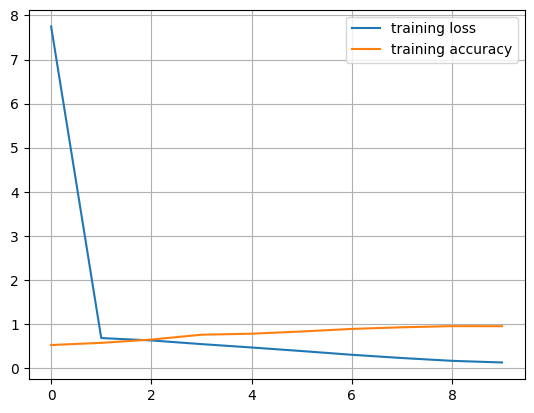

In [ ]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

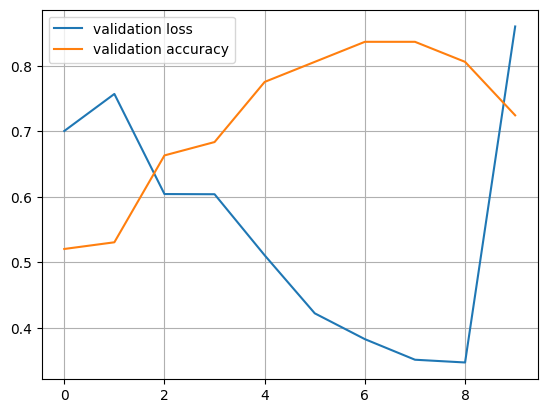

In [ ]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 6s 1s/step


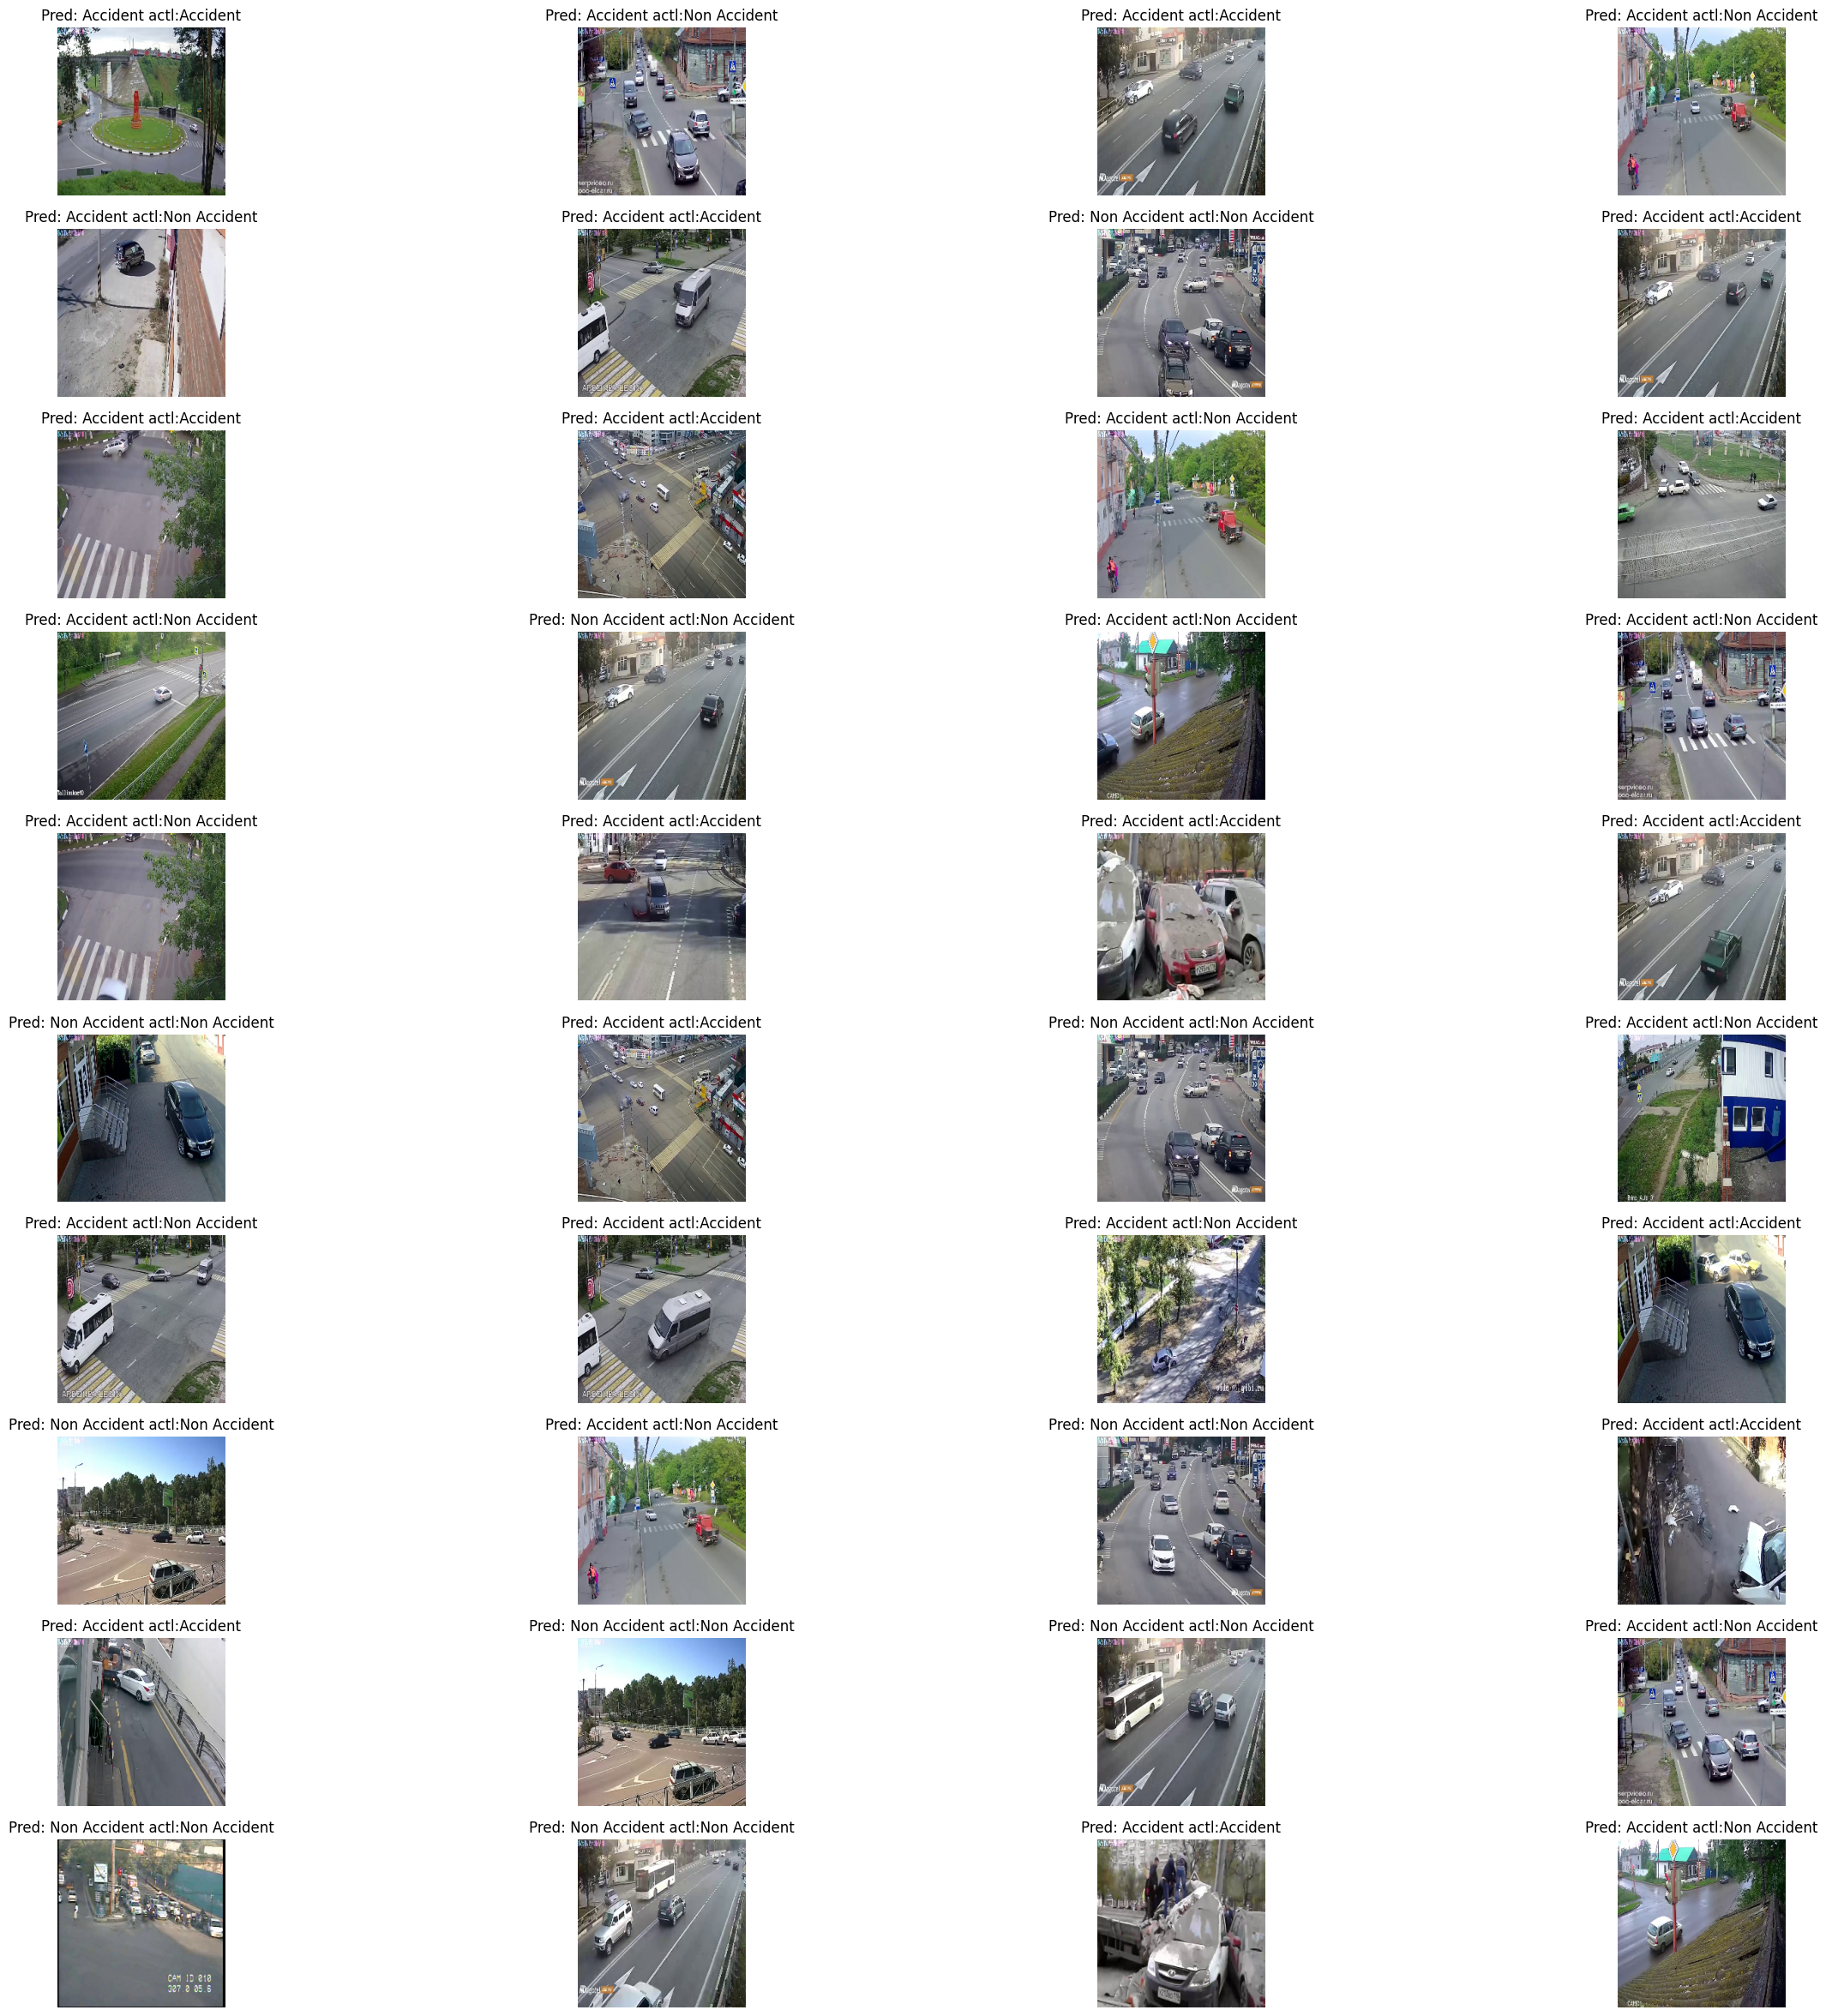

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)


4/4 [==============================] - 5s 795ms/step


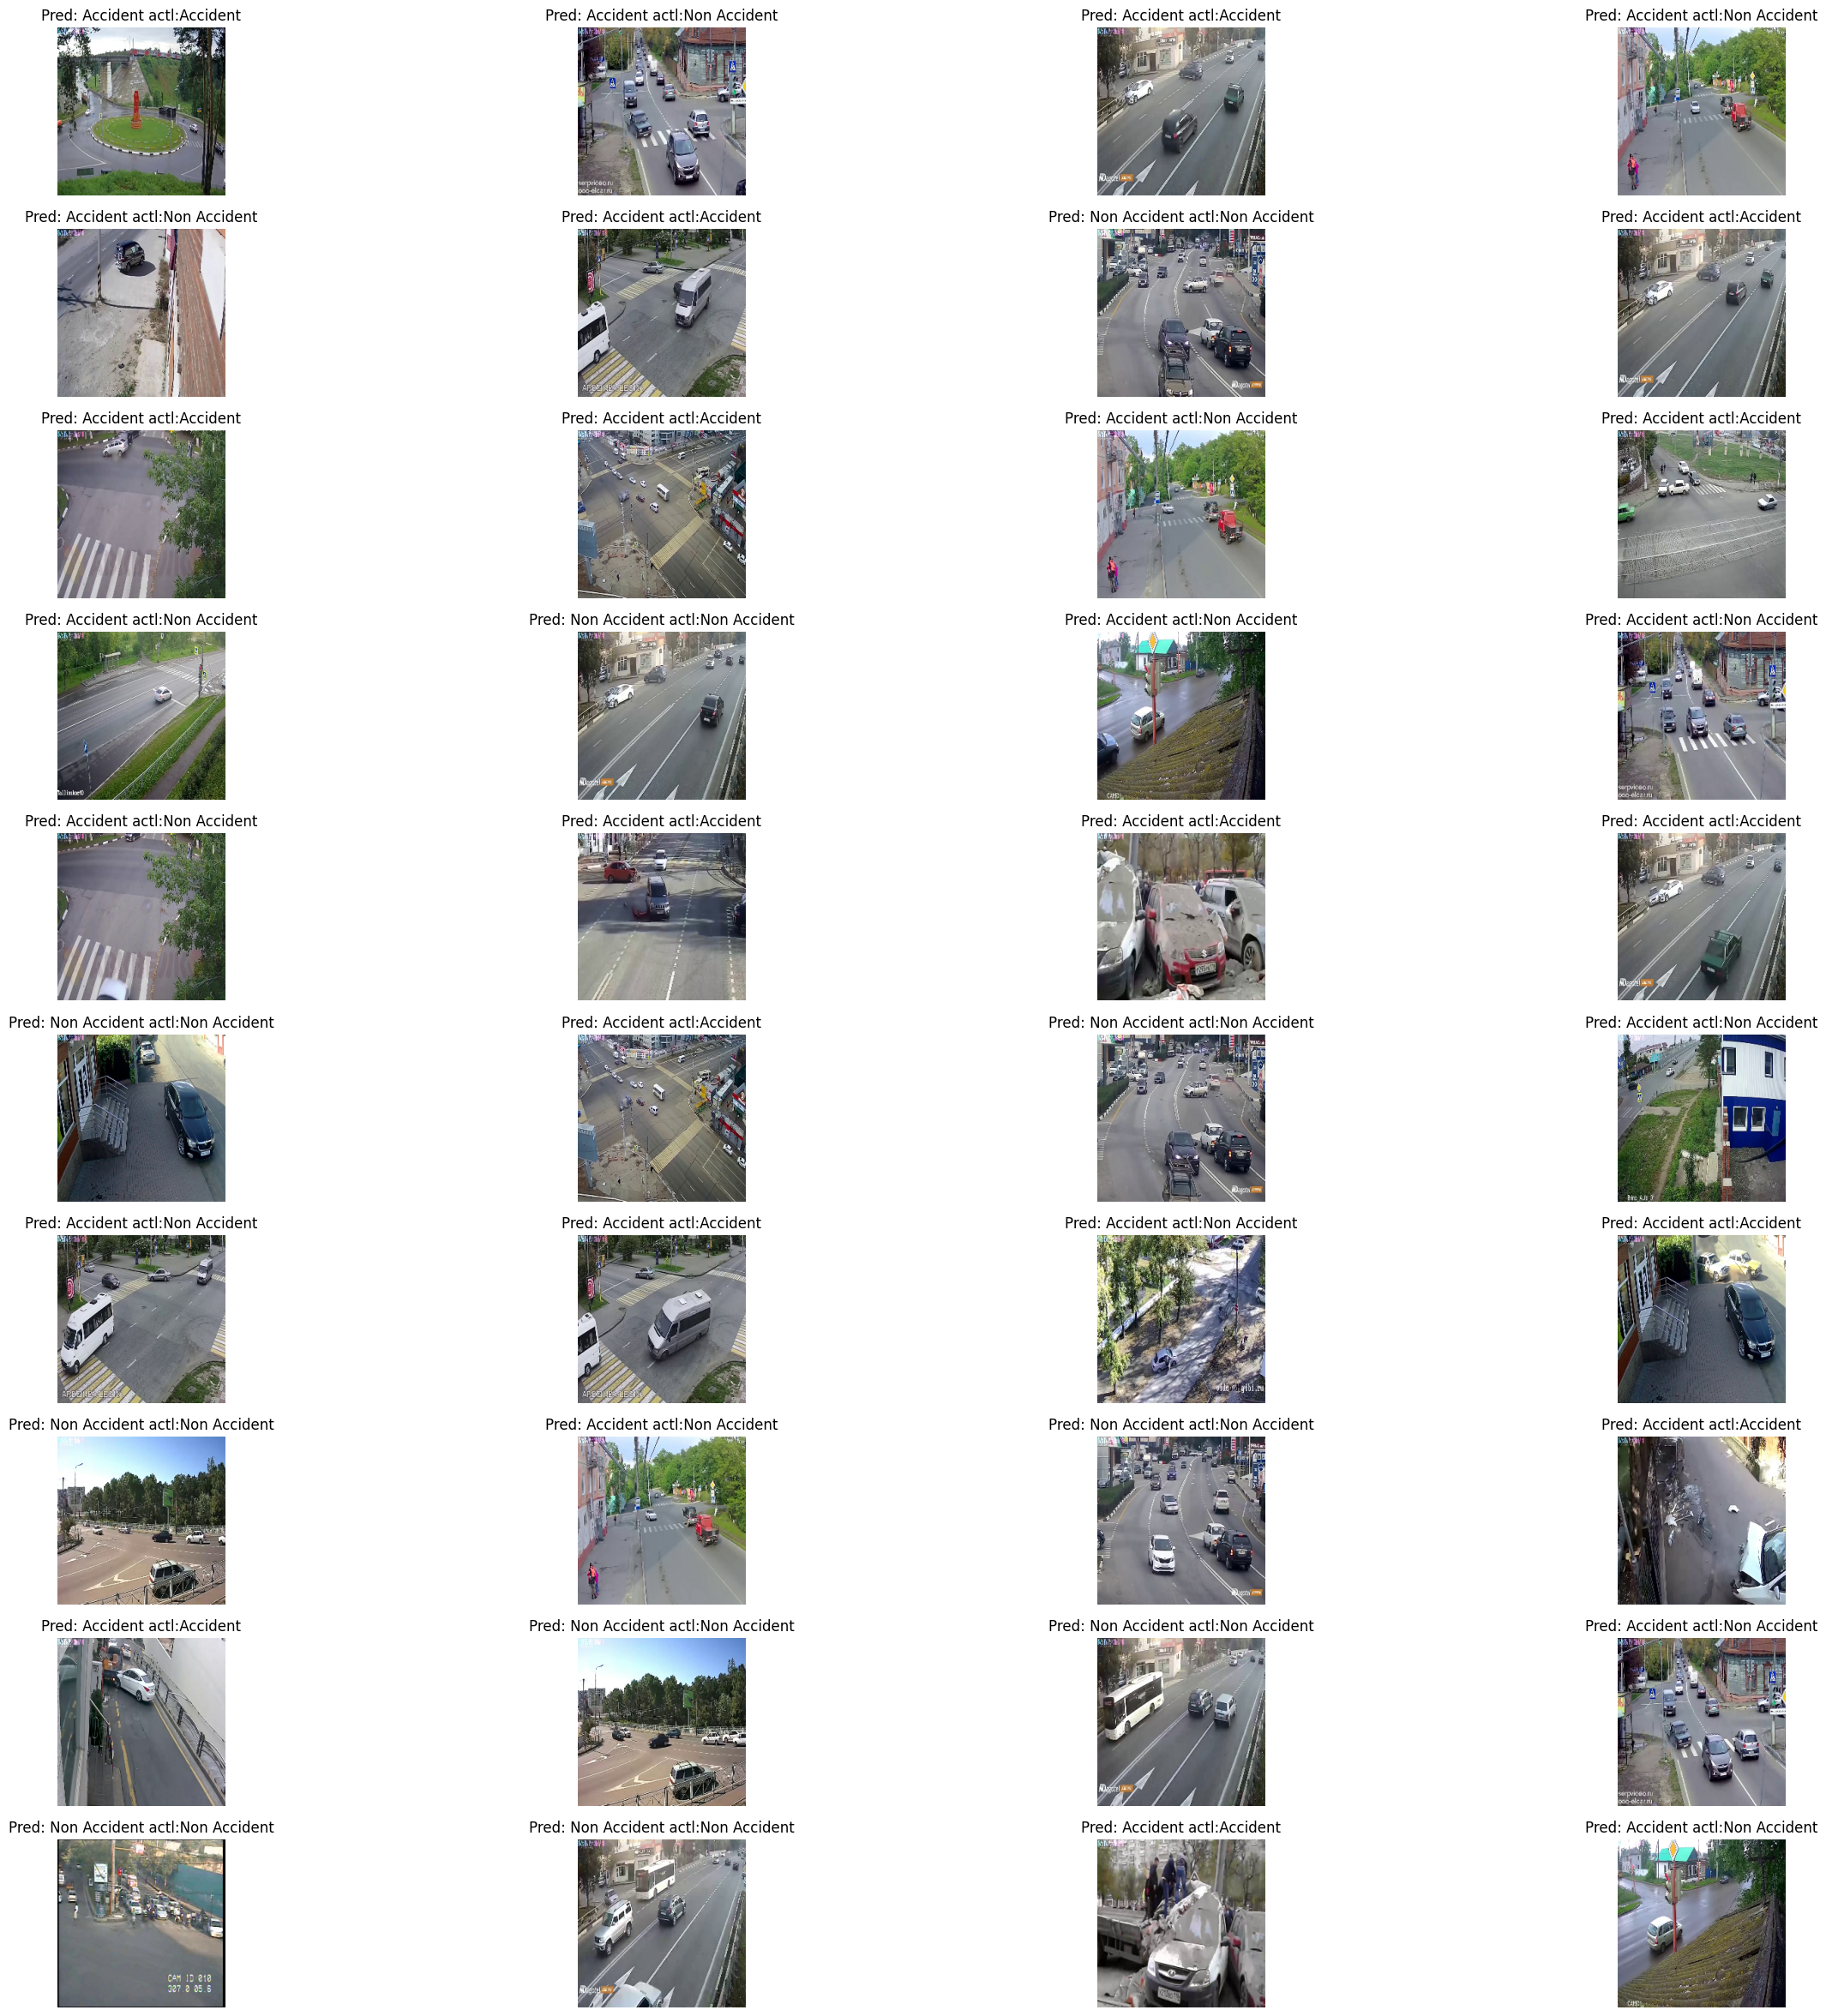

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)


In [ ]:
MyCnn.save('Model.h5')

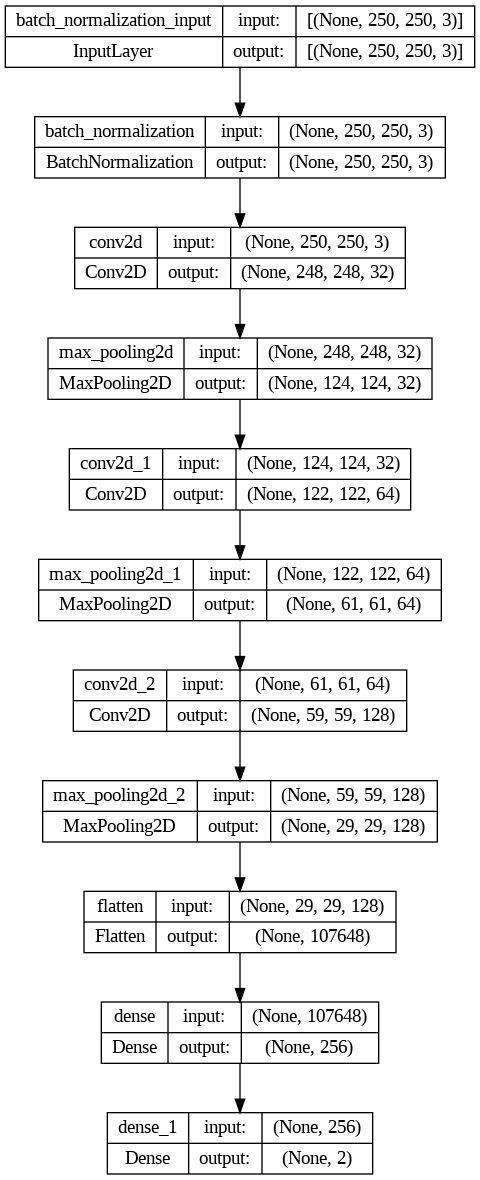

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)